In [1]:
import os
import simulation
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from data_pd.dump_features import dump_features
from simulation.sfh_in_box import compute_binned_sfh, plot_binned_sfh, bin_sfh, plot_hist_sfh
import tqdm
import astropy.units as u
from simulation.units import *
from simulation.angmom import sideon, faceon
from simulation.derived import feh, mgfe

In [2]:
# SIM_PATH = "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_pXX_a800_r600"
SIM_PATH = "/home/michele/sim/MySimulations/ng/mb.69002_pXX_a800_r600"
PERI_LIST = [50, 100, 150, 200, 300]

In [3]:
NTH = 10

In [4]:
sims = list()
for peri in PERI_LIST:
    sim_path = os.path.join(SIM_PATH.replace('XX', str(peri)), 'out')
    sims.append(simulation.Simulation(sim_path, snap_indexes=slice(None, None, NTH))) 

loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p50_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p150_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/n

In [5]:
cache_files = ['mb.69002_pXX_a800_r600.fits'.replace('XX', str(peri)) for peri in PERI_LIST]

In [6]:
cache_files

['mb.69002_p50_a800_r600.fits',
 'mb.69002_p100_a800_r600.fits',
 'mb.69002_p150_a800_r600.fits',
 'mb.69002_p200_a800_r600.fits',
 'mb.69002_p300_a800_r600.fits']

In [7]:
tbl_list = list()
tbl_list = [Table.read(os.path.join('data_pd', f)) for f in cache_files]

In [8]:
tbl_list[0].info()

<Table length=563>
    name     dtype      unit    
----------- ------- ------------
          t float64          Gyr
  mass_star float64      solMass
 sigma_star float32       km / s
  sigma_gas float32       km / s
      r_eff float64          kpc
    r_eff3d float64          kpc
        sfr float64 solMass / yr
metals_star float64             


In [9]:
moria_tbl = Table.read('moria69002.fits')

In [10]:
moria_sim = simulation.MoriaSim(69002)

loading simulation: 69002
Found 165 snapshots
Found 165 snapshots
No sumfile found


Fixing cosmological parameters of MoRIA simulation


# Trajectories

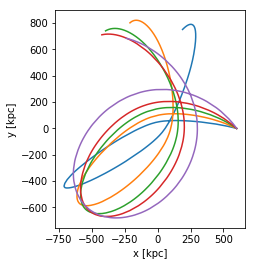

In [11]:
fig, ax = plt.subplots()
for sim in sims:
    ax.plot(sim.trace.x, sim.trace.y)
    ax.set_aspect('equal')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')

In [12]:
a = sims[0]

# SFH

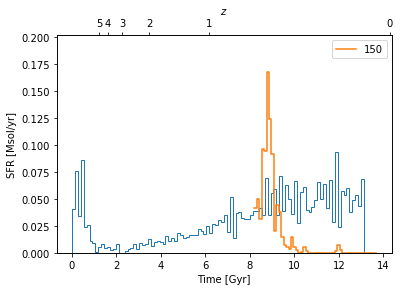

In [23]:
fig, ax = plt.subplots()
bins_sfh = 50
sim_idx = 2
hist, binedges = bin_sfh(tbl_list[sim_idx]['t'], tbl_list[sim_idx]['sfr'], bins=bins_sfh)
moria_sim.plot_sfh(ax_sfh=ax)
plot_hist_sfh(hist, binedges, ax=ax, label=sims[sim_idx].peri)
ax.legend();

ValueError: Can't cast from structure to non-structure, except if the structure only has a single field.

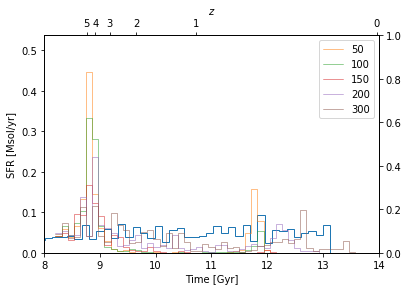

In [28]:
fig, ax = plt.subplots()
bins_sfh = 50
moria_sim.plot_sfh(ax_sfh=ax)
for sim_idx in range(len(sims)):
    hist, binedges = bin_sfh(tbl_list[sim_idx]['t'], tbl_list[sim_idx]['sfr'], bins=bins_sfh)
    plot_hist_sfh(hist, binedges, ax=ax, label=sims[sim_idx].peri, linewidth=0.5)
ax.legend();
ax.set_xlim(8, 14)
ax_r = ax.twinx()
ax_r.plot(tbl_list[sim_idx]['t']tbl_list[sim_idx], '--')

100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


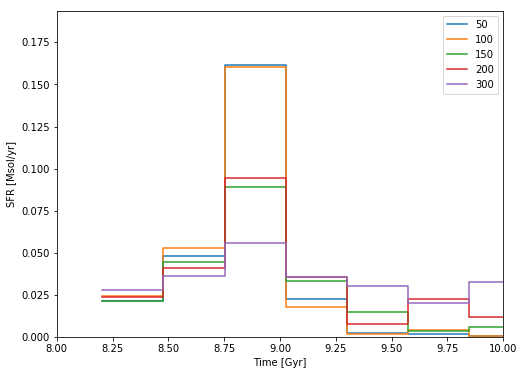

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for sim in tqdm.tqdm(sims):
    plot_binned_sfh(sim, bins=20, ax=ax, label=sim.peri, drawstyle='default');
    
ax.set_xlim(8, 10)
ax.legend()

In [12]:
# i = a._sim_dir.find('_p')
# j = a._sim_dir.find('_a')
# a._sim_dir[i+2:j]

In [13]:
# fig, ax = plt.subplots(figsize=(8,6))
# for sim in sims:
#     print(sim.peri)
#     plot_sfh(sim, ax=ax, label=sim.peri)#, trange=a.t_range, bins=20)

# Effective radius

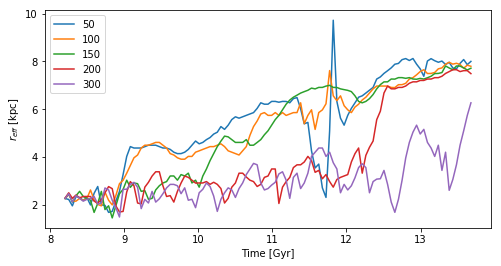

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'][::5], tbl['r_eff3d'][::5], label=sim.peri)
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$r_{eff}$ [kpc]')
ax.legend();

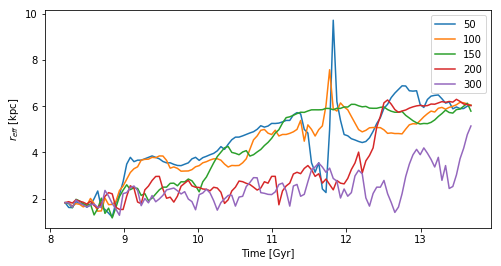

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'][::5], tbl['r_eff'][::5], label=sim.peri)
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$r_{eff}$ [kpc]')
ax.legend();

# Metals

In [16]:
(a[1].s['metals']==0).sum(), len(a[1].s['metals'])

(SimArray(1783), 14048)

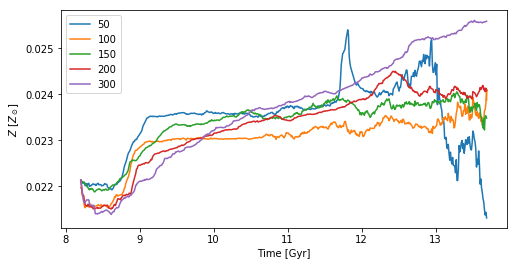

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'], tbl['metals_star']*1e10, label=sim.peri)
# ax.set_yscale('log')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$Z$ [$Z_\odot$]')
ax.legend();

# Profiles

In [18]:
pynbody.units.Unit('1e10 Msol kpc**3 s**2')

Unit("1.00e+10 Msol kpc**3 s**2")

<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p50_a800_r600/out/snapshot_0021::star" len=14440>


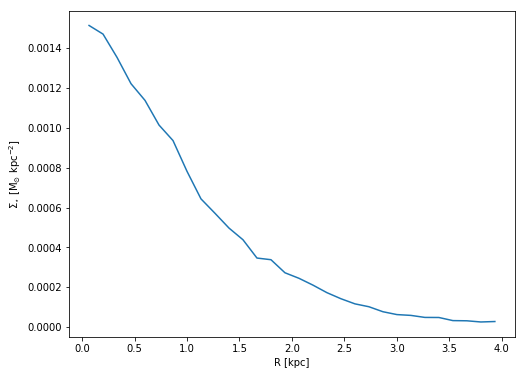

In [19]:
# create a profile object for the stars (by default this is a 2D profile)
snap = sims[0][2]
# myfaceon(snap.s)
sideon(snap.s)
print(snap.s)
snap.properties['eps'] = 0.03


p = pynbody.analysis.profile.Profile(snap.s, min=0.0, max=4, nbins=30, type='lin', ndim=2)
pg = pynbody.analysis.profile.Profile(snap.s, min=0.0, max=4, nbins=30, type='lin', ndim=2)
# make the figure and sub plots
f, ax = plt.subplots(figsize=(8,6))

# make the plot
ax.plot(p['rbins'], p['density'])
# ax.semilogy()
ax.set_xlabel('R [kpc]')
# ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');
ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');

# Stripping radius

In [20]:
sim=sims[4]
snap = sim[1]

In [21]:
sim.peri

'300'

In [22]:
sideon(snap.s)
p = pynbody.analysis.profile.Profile(snap, min=0.1, max=4, nbins=100, type='lin', ndim=3)
ps = pynbody.analysis.profile.Profile(snap.s, min=0.1, max=4, nbins=100, type='lin', ndim=3)
pg = pynbody.analysis.profile.Profile(snap.g, min=0.1, max=4, nbins=100, type='lin', ndim=3)

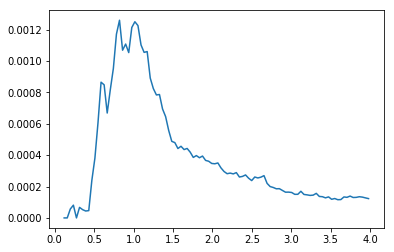

In [23]:
plt.plot(pg['rbins'], pg['density'])

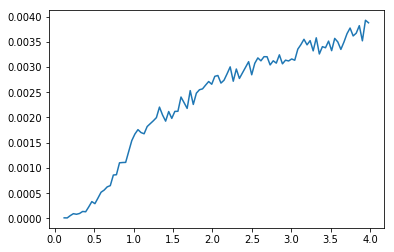

In [24]:
plt.plot(p['rbins'], p['mass'])


In [25]:
locations = np.digitize(snap.header.time, sim.dens_trace.t, right=True)
int(locations)

10828

In [26]:
sim.dens_trace.rho[int(locations)]

4.560939999999999e-09

In [27]:
rho  = pynbody.array.SimArray(sim.dens_trace.rho[int(locations)], gadget_dens_units)
v_host = pynbody.array.SimArray(sim.dens_trace.vel[int(locations)],  gadget_vel_units)
rho, v_host

(SimArray(4.56094e-09, '1.00e+10 Msol kpc**-3'), SimArray(732.03, 'km s**-1'))

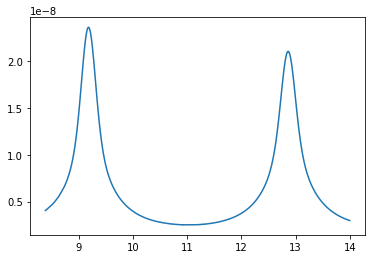

In [28]:
plt.plot(sim.dens_trace.t, sim.dens_trace.rho)

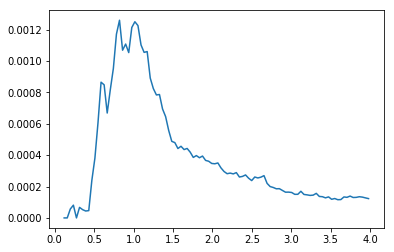

In [29]:
f, ax = plt.subplots()
# ax.plot(p['rbins'], p['mass'])
ax.plot(pg['rbins'], pg['density'])


In [30]:
G = pynbody.array.SimArray(6.674e-11, pynbody.units.Unit("N kg**-2 m**2"))
G

SimArray(6.674e-11, 'N kg**-2 m**2')

In [31]:
p_grav = G * p['mass']*pg['density']/p['rbins']
p_grav.in_units('Pa')

SimArray([0.00000000e+00, 0.00000000e+00, 4.72915399e-16, 9.41644084e-16,
          0.00000000e+00, 6.10848716e-16, 5.98464769e-16, 4.32192283e-16,
          7.19108623e-16, 4.92519250e-15, 6.38527851e-15, 1.29996631e-14,
          2.22543834e-14, 2.21211290e-14, 1.82880936e-14, 2.19156195e-14,
          3.20654712e-14, 3.77370804e-14, 4.92012632e-14, 4.00599625e-14,
          3.98116996e-14, 4.34112251e-14, 5.57697470e-14, 5.98428301e-14,
          5.94700948e-14, 4.98790727e-14, 4.54490493e-14, 4.79276274e-14,
          4.02145909e-14, 3.71309869e-14, 3.53375408e-14, 3.80113999e-14,
          3.02823948e-14, 2.57554268e-14, 2.37685996e-14, 1.89716201e-14,
          1.94447161e-14, 1.74923043e-14, 1.99606289e-14, 1.77308678e-14,
          1.67255851e-14, 1.79672888e-14, 1.44268383e-14, 1.59704435e-14,
          1.55086118e-14, 1.57138453e-14, 1.47287488e-14, 1.46060406e-14,
          1.34870350e-14, 1.39297120e-14, 1.39496422e-14, 1.18060404e-14,
          1.09828082e-14, 1.07548513e-

In [32]:
p_rps = rho * v_host**2
p_rps.in_units('Pa')

SimArray(1.65453771e-15, 'Pa')

In [33]:
fun = (p_grav/p_rps).in_units(1)
fun

SimArray([ 0.        ,  0.        ,  0.28582933,  0.56912821,  0.        ,
           0.36919601,  0.36171117,  0.26121634,  0.43462812,  2.97677863,
           3.85925232,  7.85697599, 13.45051445, 13.36997571, 11.05329507,
          13.24576609, 19.38032054, 22.80823225, 29.73716635, 24.21217853,
          24.06212883, 26.2376764 , 33.70714767, 36.1689127 , 35.94363209,
          30.14683335, 27.46933413, 28.96738288, 24.30563571, 22.44191028,
          21.35795424, 22.97403048, 18.30263196, 15.56653957, 14.36570433,
          11.46641744, 11.75235591, 10.57232129, 12.06417281, 10.71650869,
          10.1089174 , 10.8594012 ,  8.71955848,  9.65251102,  9.37338067,
           9.49742347,  8.90203269,  8.82786805,  8.1515428 ,  8.41909611,
           8.43114188,  7.13555233,  6.63799206,  6.50021527,  6.78052641,
           5.92674011,  6.5283775 ,  5.43029686,  5.63715347,  5.96212821,
           5.61984391,  4.76900346,  5.5555525 ,  5.53073828,  5.45837591,
           5.72191435,  4

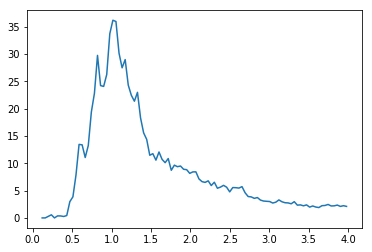

In [34]:
plt.plot(p['rbins'], fun)

In [35]:
idx = np.abs(fun.in_units(1)-1).argmin()
r_strip = p['rbins'][idx]
r_strip

0.2365

In [36]:
def compute_r_strip(sim, snap):
    try:
        sideon(snap.s)
    except ValueError:
        return np.nan
    p = pynbody.analysis.profile.Profile(snap, min=0.1, max=4, nbins=100, type='lin', ndim=3)
    pg = pynbody.analysis.profile.Profile(snap.g, min=0.1, max=4, nbins=100, type='lin', ndim=3)
    p_grav = G * p['mass']*pg['density']/p['rbins']
    
    locations = np.digitize(snap.header.time, sim.dens_trace.t, right=True)
    rho  = pynbody.array.SimArray(sim.dens_trace.rho[int(locations)], gadget_dens_units)
    v_host = pynbody.array.SimArray(sim.dens_trace.vel[int(locations)],  gadget_vel_units)
    
    p_rps = rho * v_host**2

    fun = (p_grav/p_rps).in_units(1)
    idx = np.abs(fun.in_units(1)-1.0).argmin()
    rs = p['rbins'][idx]
    return rs

In [37]:
r_strip_list = list()
for snap in tqdm.tqdm(sim):
    rs1 = compute_r_strip(sim, snap)
#     print(rs1)
    r_strip_list.append(rs1)
r_strip = np.array(r_strip_list)

100%|██████████| 57/57 [00:23<00:00,  2.59it/s]


In [38]:
r_strip

array([0.1195, 0.4315, 3.8245, 3.7075, 3.3175, 3.2395, 2.4595, 1.7575,
       1.0945, 1.2505, 2.3035, 0.5095, 2.7715, 3.1225, 3.5125, 3.6295,
       3.9415, 3.9805, 3.9805, 0.2755, 0.1585, 3.7855, 3.9415, 0.4315,
       0.1975, 0.2365, 0.2755, 3.9415, 0.1585, 0.2755, 0.3925, 3.9805,
       3.9805, 3.3565, 0.3925, 2.2255, 1.6795, 2.4985, 1.8355, 2.7325,
       2.8105, 1.7575, 1.9525, 2.7325, 2.0305, 0.3535, 0.8605, 2.7325,
       1.9135, 0.6655, 0.8605, 1.8745, 1.2895, 1.6795, 3.5905, 3.8635,
       3.9805])

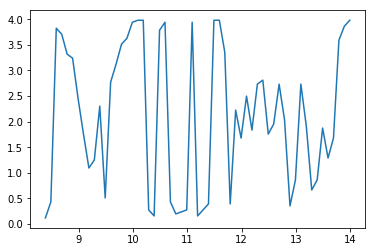

In [39]:
plt.plot(sim.times.in_units(gadget_time_units), r_strip)

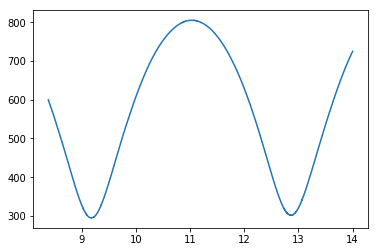

In [40]:
plt.plot(sim.dens_trace.t, sim.dens_trace.r)

## For loop

In [43]:
surf_bright = {}
v_circ = {}
dens = {}
sim = sims[1]
for i, snap in enumerate(sim):
    # myfaceon(snap.s)
    sideon(snap.s)
#     print(snap.s)
    snap.properties['eps'] = 0.03
    p = pynbody.analysis.profile.Profile(snap.s, max=4, nbins=100, type='lin', ndim=2)
    surf_bright[i+1] = p['sb']
    v_circ[i+1] = p['v_circ']
    dens[i+1] = p['density']
# TODO catch the ValueError for few particles and skip snaps

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0001::star" len=13773>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0011::star" len=14063>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0021::star" len=14523>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0031::star" len=14882>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0041::star" len=15236>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0051::star" len=16218>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0061::star" len=16973>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0071::star" len=20255>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0081::star" len=21582>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0091::star" len=21901>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0101::star" len=21882>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0111::star" len=21730>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0121::star" len=21542>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0131::star" len=21355>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0141::star" len=20971>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0151::star" len=20763>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0161::star" len=20570>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0171::star" len=20291>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0181::star" len=19700>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0191::star" len=18786>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0201::star" len=18468>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0211::star" len=18249>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0221::star" len=18119>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0231::star" len=18066>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0241::star" len=17842>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0251::star" len=17663>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0261::star" len=17256>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0271::star" len=16358>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0281::star" len=15014>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0291::star" len=13622>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0301::star" len=12353>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0311::star" len=11204>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0321::star" len=10169>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0331::star" len=9353>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0341::star" len=8705>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0351::star" len=8179>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0361::star" len=7695>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0371::star" len=7167>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0381::star" len=7093>
<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0391::star" len=6672>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0401::star" len=6613>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0411::star" len=6599>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0421::star" len=6565>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0431::star" len=6479>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0441::star" len=6372>


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p100_a800_r600/out/snapshot_0451::star" len=6257>


ValueError: Insufficient particles around center to get velocity

In [44]:
tbl_v_circ = Table({str(k):v*u.km/u.s for (k,v) in v_circ.items()})
tbl_sb = Table({str(k):v*u.mag/u.arcsec**2 for (k,v) in surf_bright.items()})
tbl_dens = Table({str(k):v.in_units('Msol kpc**-2')*u.solMass/u.kpc**2 for (k,v) in dens.items()})

In [45]:
tbl_v_circ['rbins'] = tbl_sb['rbins'] = tbl_dens['rbins'] = p['rbins']*u.kpc

In [46]:
# tbl_v_circ.write('71p{}prof_v_circ.fits'.format(sim.peri), overwrite=True)
# tbl_sb.write('71p{}prof_sb.fits'.format(sim.peri), overwrite=True)
# tbl_dens.write('71p{}prof_dens.fits'.format(sim.peri), overwrite=True)

In [47]:
sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
sim[0].s['v_mag']

SimArray([-4.65901387, -4.63670569, -4.65645719, ..., -4.63621435,
          -4.69968668, -4.66626653])

In [26]:
str(71002)[:2]

'71'

In [31]:
# sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
# metals_d = dict()
# for sim in sims:
#     metals_l = list()
#     for snap in tqdm.tqdm(sim.snap_list):
#         pynbody.analysis.halo.center(snap.s, vel=False)
#         metals_l.append(snap.s[sphere]['metals'].sum())
#     metals = np.array(metals_l)
#     metals_d[sim.peri] = metals
# tbl = Table(metals_d)
# tbl.write('71metals_s5.fits')